In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2
from PIL import Image

#import cc3d

from skimage.measure import regionprops, label, find_contours
from scipy.spatial.distance import cdist

import pandas as pd

In [2]:
#値を-1から1に正規化する関数
def normalize_x(image):
    return image / 127.5 - 1


def denormalize_x(image):
    return (image + 1) * 127.5


#値を0から1正規化する関数
def normalize_y(image):
    return image / 255


#値を0から255に戻す関数
def denormalize_y(image):
    return image * 255

In [29]:
# インプット画像を読み込む関数
def load_X_gray(folder_path):
    
    image_files = []

    #image_files = os.listdir(folder_path)
       
    for file in os.listdir(folder_path):
        base, ext = os.path.splitext(file)
        if ext == '.png':
            image_files.append(file)
        else :
            pass
        
    image_files.sort()
    print (image_files)
    
    img = cv2.imread(folder_path + os.sep + image_files[0], cv2.IMREAD_GRAYSCALE)
    
    #image_files = image_files[1:]
    images = np.zeros((len(image_files), img.shape[0], img.shape[1], 1), np.float32)
    for i, image_file in enumerate(image_files):
        image = cv2.imread(folder_path + os.sep + image_file, cv2.IMREAD_GRAYSCALE)
        print (image.shape)
        #image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
        image = image[:, :, np.newaxis]
        images[i] = normalize_x(image)
    return images, image_files


# インプット画像を読み込む関数
def load_X_RGB(folder_path):
    
    image_files = []

    #image_files = os.listdir(folder_path)
       
    for file in os.listdir(folder_path):
        base, ext = os.path.splitext(file)
        if ext == '.png':
            image_files.append(file)
        else :
            pass
        
    image_files.sort()
    print (image_files)
    
    img = cv2.imread(folder_path + os.sep + image_files[0], cv2.IMREAD_GRAYSCALE)
    
    #image_files = image_files[1:]
    images = np.zeros((len(image_files), img.shape[0], img.shape[1], 3), np.float32)
    for i, image_file in enumerate(image_files):
        image = cv2.imread(folder_path + os.sep + image_file)
        print (image.shape)
        #image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
        #image = image[:, :, np.newaxis]
        images[i] = normalize_y(image)
    return images, image_files


def load_Y_gray_with_gaussian_and_numeric(folder_path, thresh = None , normalize = True, g_size = None):
    image_files = []
    #image_files = os.listdir(folder_path)
    
    for file in os.listdir(folder_path):
        base, ext = os.path.splitext(file)
        if ext == '.png':
            image_files.append(int(base))
        else:
            pass
        
    image_files.sort()
    print(image_files)
    
    img = cv2.imread(folder_path + os.sep + str(image_files[0]).zfill(4) + ".png", cv2.IMREAD_GRAYSCALE)
    
    images = np.zeros(
        (len(image_files), img.shape[0], img.shape[1], 1) ,np.float32
    )
    
    for i , image_file in enumerate(image_files):
        image = cv2.imread(
            folder_path + os.sep + str(image_file).zfill(4) + ".png" ,
            cv2.IMREAD_GRAYSCALE
        )
        #print(image.shape)
        
        # ぼかし処理
        if g_size:
            image = cv2.GaussianBlur(
                image, (g_size, g_size), 0
            )
        
        
        
        if thresh:
            ret , image = cv2.threshold(image , thresh , 255 , cv2.THRESH_BINARY)
        image = image[ : , : , np.newaxis]
        if normalize:
            images[i] = normalize_y(image)
        else:
            images[i] = image
            
    print(images.shape)
    
    return images , image_files

In [4]:
def make_mask_img(ori_img, mask_img):
    mask_img_rgb = np.zeros((mask_img.shape[0], mask_img.shape[1], 3), np.float32)
    mask_img_rgb[:,:,0] = mask_img[:,:,0]
    mask_img_rgb[:,:,1] = mask_img[:,:,0]
    masked_img = cv2.addWeighted(mask_img_rgb,0.5,cv2.cvtColor(ori_img + 0.75, cv2.COLOR_GRAY2BGR),0.6,0)
    return masked_img

In [5]:
def make_2_mask_img(ori_img, mask_img_1, mask_img_2):
    
    mask_img_rgb = np.zeros((mask_img_1.shape[0], mask_img_1.shape[1], 3), np.float32)
    mask_img_rgb[:,:,0] = mask_img_1[:,:,0]
    mask_img_rgb[:,:,1] = mask_img_1[:,:,0] + mask_img_2[:,:,0]
    mask_img_rgb[:,:,2] = mask_img_2[:,:,0]
    masked_img = cv2.addWeighted(mask_img_rgb,0.5,cv2.cvtColor(ori_img + 0.75, cv2.COLOR_GRAY2BGR),0.6,0)
    return masked_img

In [6]:
df = pd.read_csv(r"Z:\DeepLearningData\research_010_NIH3T3\cristae_expand_rep_fig\cristae_expand_rep_fig_zxy.csv")
df

,name,sh,crop,EM,seg,z,x,y,path
0,shCtrl003_cropped_001_01_EM,shCtrl,1,EM,tubular,281,1256,352,Y:\DeepLearningData\research_010_NIH3T3\shCtrl...
1,shCtrl003_cropped_001_01_tubular,shCtrl,1,seg,tubular,281,1256,352,Y:\DeepLearningData\research_010_NIH3T3\shCtrl...
2,shCtrl003_cropped_001_02_EM,shCtrl,1,EM,lamelllar,268,1239,485,Y:\DeepLearningData\research_010_NIH3T3\shCtrl...
3,shCtrl003_cropped_001_02_lamellar,shCtrl,1,seg,lamellar,268,1239,485,Y:\DeepLearningData\research_010_NIH3T3\shCtrl...
4,shCtrl003_cropped_001_01_EM#2,shCtrl,2,EM,tubular,173,275,673,Y:\DeepLearningData\research_010_NIH3T3\shCtrl...
5,shCtrl003_cropped_001_01_tubular#2,shCtrl,2,seg,tubular,173,275,673,Y:\DeepLearningData\research_010_NIH3T3\shCtrl...
6,shCtrl003_cropped_001_02_EM#2,shCtrl,2,EM,lamelllar,267,1104,666,Y:\DeepLearningData\research_010_NIH3T3\shCtrl...
7,shCtrl003_cropped_001_02_lamellar#2,shCtrl,2,seg,lamellar,267,1104,666,Y:\DeepLearningData\research_010_NIH3T3\shCtrl...
8,shOPA1003_cropped_002_01_EM,shOPA1,1,EM,tubular,214,358,752,Y:\DeepLearningData\research_010_NIH3T3\shOPA1...
9,shOPA1003_cropped_002_01_tubular,shOPA1,1,seg,tubular,214,358,752,Y:\DeepLearningData\research_010_NIH3T3\shOPA1...


In [7]:
input_path = "Z:/paper_data/2021_cristae/cristae_dilated_figure/"

In [30]:
original_imgs, _ = load_X_RGB(input_path)

['shCtrl_lamellar_001_ori.png', 'shCtrl_lamellar_001_seg.png', 'shCtrl_lamellar_002_ori.png', 'shCtrl_lamellar_002_seg.png', 'shCtrl_tubular_001_ori.png', 'shCtrl_tubular_001_seg.png', 'shCtrl_tubular_002_ori.png', 'shCtrl_tubular_002_seg.png', 'shOPA1_lamellar_001_ori.png', 'shOPA1_lamellar_001_seg.png', 'shOPA1_lamellar_002_ori.png', 'shOPA1_lamellar_002_seg.png', 'shOPA1_tubular_001_ori.png', 'shOPA1_tubular_001_seg.png', 'shOPA1_tubular_002_ori.png', 'shOPA1_tubular_002_seg.png']
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)


In [31]:
original_imgs.shape

(16, 200, 200, 3)

In [32]:
    img = np.zeros((50, 50, 3), np.float32)
    ori = original_imgs[1][75:125, 75:125]

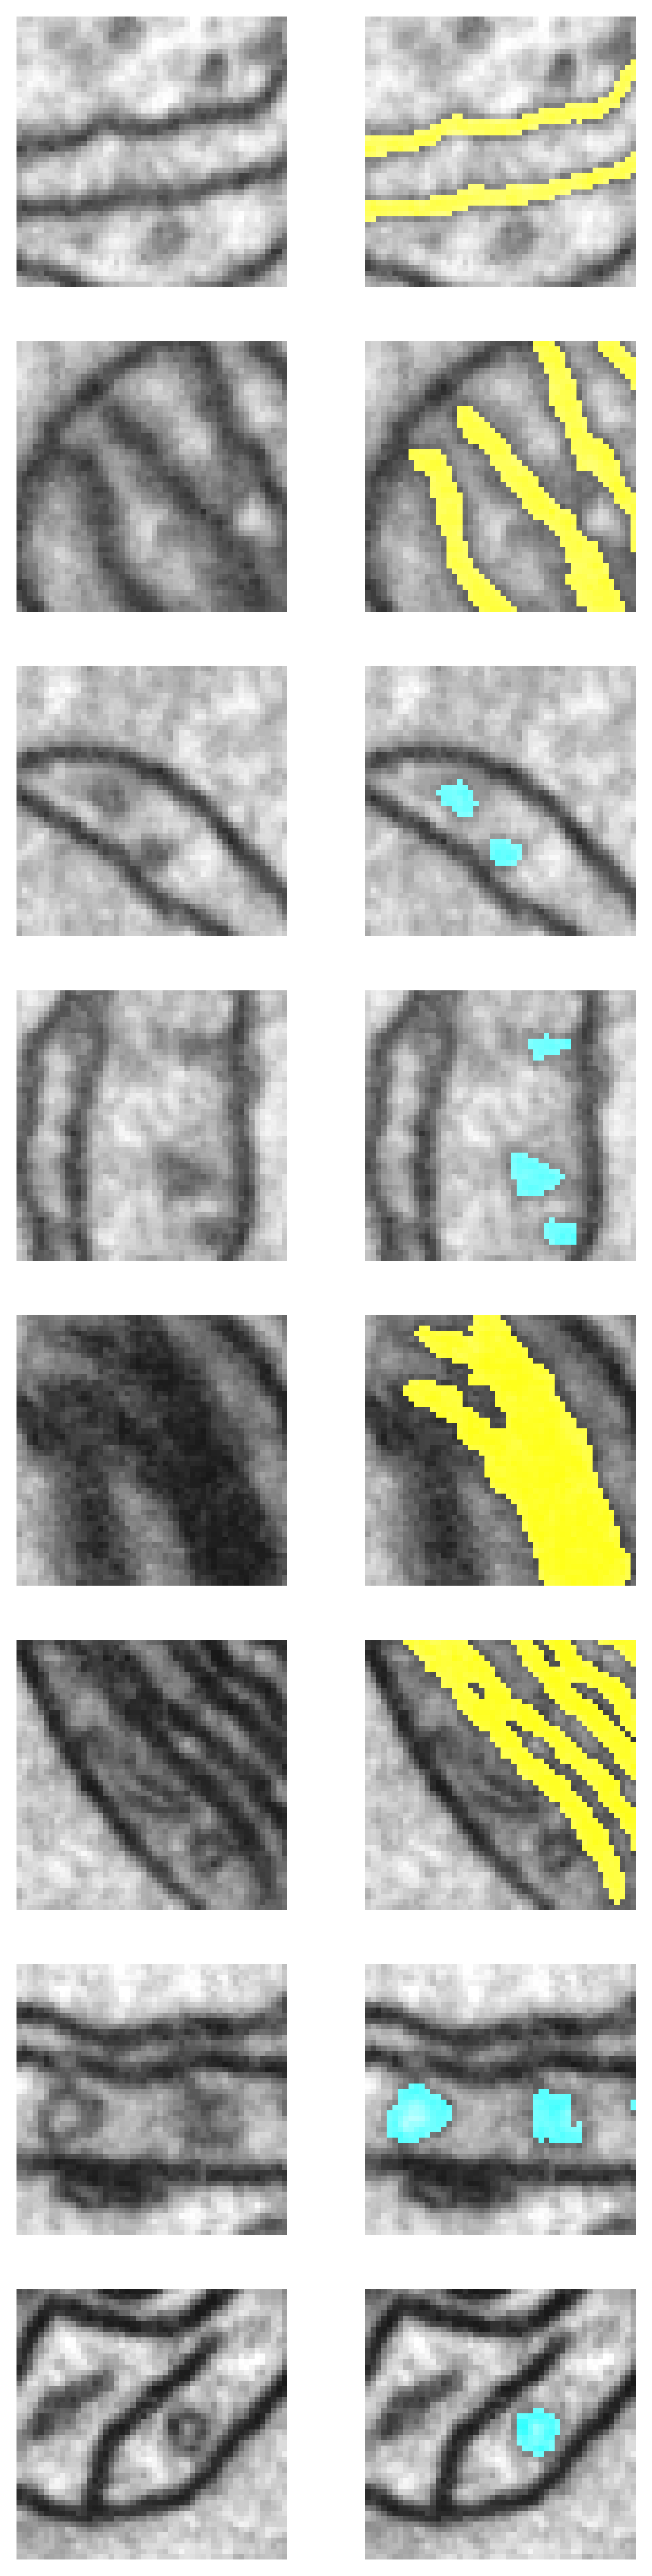

In [34]:
out_path = "Z:/paper_data/2021_cristae/for_revision_#2/figS9C"
os.makedirs(out_path, exist_ok = True)

plt.figure(dpi = 400,  figsize=(5, 20))

for i in range(4):
    plt.subplot(8, 2,  i+1)
    plt.axis("off")
    plt.imshow(original_imgs[i][75:125, 75:125])
    #img = np.zeros((50, 50, 3), np.float32)
    img=original_imgs[i][75:125, 75:125]
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    cv2.imwrite(
        f"{out_path}/cropped_{str(i).zfill(2)}.png",
        img
    )
    
for i in range(4,  6):
    plt.subplot(8, 2,  i+1)
    plt.axis("off")
    plt.imshow(original_imgs[i][35:85, 85:135])
    #img = np.zeros((50, 50, 3), np.float32)
    img=original_imgs[i][35:85, 85:135]
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    cv2.imwrite(
        f"{out_path}/cropped_{str(i).zfill(2)}.png",
        img
    )
    
for i in range(6,  8):
    plt.subplot(8, 2,  i+1)
    plt.axis("off")
    plt.imshow(original_imgs[i][75:125, 95:145])
    #img = np.zeros((50, 50, 3), np.float32)
    img=original_imgs[i][75:125, 95:145]
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    cv2.imwrite(
        f"{out_path}/cropped_{str(i).zfill(2)}.png",
        img
    )
    
for i in range(8,  10):
    plt.subplot(8, 2,  i+1)
    plt.axis("off")
    plt.imshow(original_imgs[i][55:105, 75:125])
    #img = np.zeros((50, 50, 3), np.float32)
    img=original_imgs[i][55:105, 75:125]
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    cv2.imwrite(
        f"{out_path}/cropped_{str(i).zfill(2)}.png",
        img
    )
    
for i in range(10,  16):
    plt.subplot(8, 2,  i+1)
    plt.axis("off")
    plt.imshow(original_imgs[i][75:125, 75:125])
    #img = np.zeros((50, 50, 3), np.float32)
    img=original_imgs[i][75:125, 75:125]
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    cv2.imwrite(
        f"{out_path}/cropped_{str(i).zfill(2)}.png",
        img
    )